In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from astropy import units as u
from poliastro.bodies import Earth, Moon
from poliastro.twobody.orbit import Orbit
from astropy.constants import G
from poliastro.twobody.sampling import TrueAnomalyBounds
from astropy.coordinates import CartesianRepresentation
plt.rcParams['font.family'] = 'Serif'
import sympy as sp
sp.init_printing()

# 4.1 Introduction

Previous chapters were limited to the discussion of orbital mechanics confined to two dimensions, i.e., the orbital plane. In this chapter, the means for defining orbits in three dimensions are explored. The focus of this chapter will be limited to earth bound orbits, but the results can be generalised for interplanetary missions too.

# 4.2 Geocentric Right Ascension-Declination Frame

The coordinate system used to desribe earth orbits in three dimensions is defined in terms of:

1. **Earth's Equatorial Plane:** The plane passing through earth's equator.
2. **Ecliptic Plane:** The plane defined by earth's orbit around the sun.
3. **Earth's Rotational Axis:** The rotational axis is tilted away from the ecliptic by an angle called the *obliquity of the ecliptic* $\epsilon$. The value of $\epsilon$ for earth is $23.4^{\circ}$.

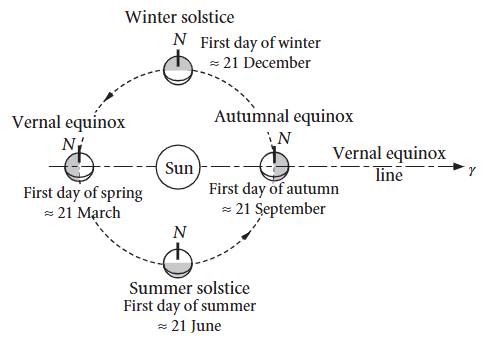

The equatorial plane and the ecliptic intersect at a line called the **vernal equinox line**. The position of the sun at the instant when it crosses the equator from south to north in the noon time defines the location of a point in the sky called the vernal equinox, denoted by $\gamma$. The calendar marking of 'vernal equinox' is derived from this, which marks the beginning of spring in the northern hemisphere. THe direction of the vernal equinox line is from the earth towards $\gamma$, as shown in the above image.

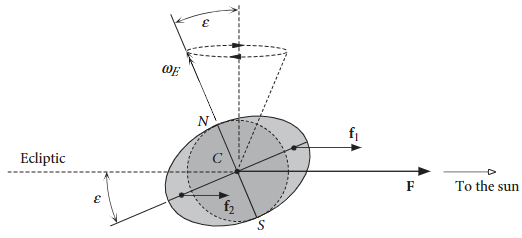

For practical purposes, the vernal equinox line can be considered fixed in space. However, it rotates slowly as the earth's rotational axis precesses anticlockwise around the normal to the ecliptic at a rate of $1.4^{\circ}$ per century when viewed from earth's surface towards the North Pole. This precession is primarily due to the action of the sun and the moon on the non-spherical mass distribution of the earth. 

Due to the uneven mass distribution, there is an uneven gravitational force on the earth which creates a moment trying to align the equatorial plane and the ecliptic. The combined effect of the sun and moon leads to a precession of the spin axis with a period of 26,000 years. The moon's action also superimposes a small nutation on the prcession . This causes the obliquity $\epsilon$ to vary with an amplitude of $0.0025^{\circ}$ over a period of $18.6^{\circ}$. 

---

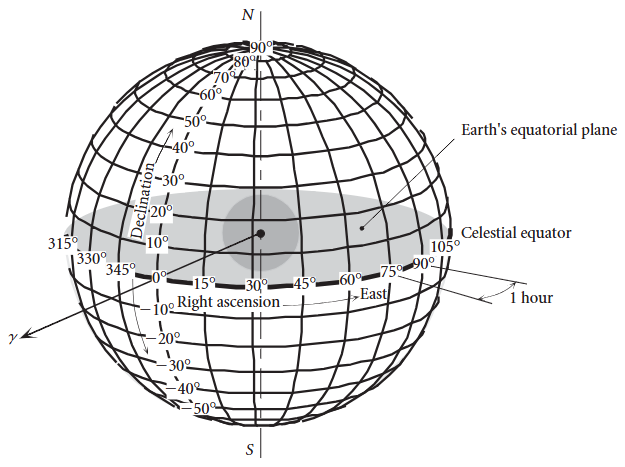

Objects in the night sky appear as points on a celestial sphere surrounding the earth, as shown in the above image. The north and the south poles of the sphere align with that of the earth rotating within it. The projection of earth's equator on this celestial sphere defines the celestial equator. The coordinates of latitude and longitude are used to locate any point on the celestial sphere in the same way as that done on the earth's surface. The vernal equinox $\gamma$, which lies on the celestial equator, serves as the origin for the measurement of the longitudes, which in astronomical parlance is called the right ascension. 

Right Ascension (RA or $\alpha$) is measured along the celestial equator indegress east from the vernal equinox. Astronomers measure hours instead of degrees for RA, where $24$ hours equals $360^{\circ}$. Latitude on the celestial sphere is called declination. Declination (Dec or $\delta$) is positive towards the north. 

The coordinates of the celestial bodies as a function of time is called *ephemeris*. An ephemeris depends on the location of the vernal equinox at a given time. Before 2025, the position of the vernal equinox in the year 2000 was used to define the celestial grid. In 2025, the position will be updated to that of 2050. Then in 2075, it will be updated to that of 2100; amd so on at an interval of 50 years. Since observation are made relative to the actual orientation of the earth, these measurements must be transformed to the standardised celestial frame of reference.

# 4.3 State Vector and The Geocentric Equatorial Frame

The state vector of an object comprises of its velocity $\mathbf v$ and acceleration $\mathbf a$ at any given time. Orbital mechanics is concerned with knowing the state vectors over time intervals. The equations governing the state vector propagation in time for earth bound satellites is 
$$
    \mathbf{\ddot r} = -\frac{\mu}{r^3}\mathbf r
$$

where the measurements of $\mathbf{\ddot r}$ and $\mathbf r$ must be measured in an inertial (non-rotating) frame attached to earth. A commonly used frame is the Geocentric Equatorial Inertial (GEI) Frame. Its a standard ECI frame based on the current position of $\gamma$ (J2000), as shown below.

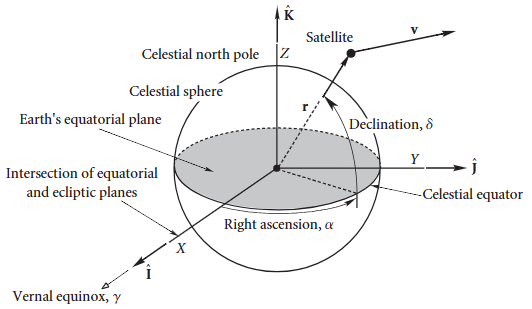

The $X$ axis of the frame points towards the vernal equinox direction. The $XY$ plane is the earth's equatorial plane and the $Z$ axis aligns with the earth's rotational axis, pointing towards north. In this frame, the state vector is given in component form as,
$$
    \begin{align*}
        \mathbf r &= X\mathbf{\hat I} + Y\mathbf{\hat J} + Z\mathbf{\hat K} \\
        \mathbf v &= v_X\mathbf{\hat I} + v_Y\mathbf{\hat J} + v_Z\mathbf{\hat K}
    \end{align*}
$$

If $r$ is the magnitude of the position vector, then
$$
    \mathbf r = r\mathbf{\hat u}_r
$$

From the image above, we can write $\mathbf{\hat u}_r$ in terms of the right ascension $\alpha$ and the declination $\delta$ as,
$$
    \mathbf{\hat u}_r = \cos\delta\cos\alpha\mathbf{\hat I} + \cos\delta\sin\alpha\mathbf{\hat J} + \sin\delta\mathbf{\hat K}
$$
Therefore, given the state vector, we can compute the right ascension and declination. However, determining the opposite requires an additional information of the magnitude $r$.

In [59]:
r = np.array([-5368, -1784, 3691])*u.km

rMag = np.linalg.norm(r)
u_r = r/rMag

delta = np.arcsin(u_r[2]).to(u.deg)
alpha = (np.arctan2(u_r[1], u_r[0]).to(u.deg) + 360*u.deg)%(360*u.deg)

print('RA:', alpha.round(2))
print('Dec:', delta.round(2))


RA: 198.38 deg
Dec: 33.12 deg


If the initial state vector $\mathbf r_o$ and $\mathbf v_o$ are provided, then the state vector at any other time can be determined using the Lagrange Coefficients $f$ and $g$ as,
$$
    \mathbf r = f\mathbf r_o + g\mathbf v_o \\
    \mathbf v = \dot f\mathbf r_o + \dot g\mathbf v_o
$$

# 4.4 Orbital Elements and The State Vector

# 4.5 Coordinate Transformation

# 4.6 Transformation between Geocentric Equatorial and Perifocal Frames

# 4.7 Effect of Earth's Oblateness